In [2]:
import pandas as pd
import numpy as np
path='C:/Users/mod96/Desktop/HSH/StudyingMaterials/Project - datascience/dataset'
N=1000
M_date=50
limitpercent=0.6  #60% 넘게 뛰는건 제거하자.

1.하나의 주식에 대해서 간단한 모델 만들기

2.데이터 개수 N개 (아마 천개?) 안되는 애들 버리기 vs 데이터 없는 애들은 끝까지 0으로 채우기

3-1.전자의 경우 각 데이터에 대해 병렬적으로 트레이닝 후 가장 높은 예측값(신뢰도 x 예측%값)을 보여주기

3-2.후자의 경우 각 데이터에 대해 모델 트레이닝 후 그 모델의 끝부분만 떼고 모든 데이터를 한번 인코딩함(데이터 크기 줄이기)

4.3-2 에서 이어져서 corr 검사에서 충분히 높게 나온 애들만 모아서 트레이닝함

#### 길이 N=1000 개 이상인 애들만 모음

In [10]:
import glob
files=glob.glob(path+'/*.csv')
available=[]
for file in files:
    f=pd.read_csv(open(file.replace('\\', '/')))
    if f.shape[0]>=N:
        available.append(file.replace('\\', '/'))
print('Total :',len(files),' Available :',len(available),' percentage :',100*len(available)/len(files),'%')

Total : 3607  Available : 2478  percentage : 68.69975048516773 %


In [12]:
data=pd.Series(available)
data.to_csv(path+'/available.csv')

#### 가장 많은 데이터 가진 애들만 모음

In [3]:
available=list(pd.read_csv(open(path+'/available.csv')).iloc[:,1])
lengths={}
for file in available:
    f=pd.read_csv(open(file))
    temp=f.shape[0]
    lengths.setdefault(temp,[]).append(file)

In [4]:
max(lengths.keys())

5996

In [5]:
maximumdates=lengths[5996]
for item in maximumdates:
    print(item[-10:-4])
    #005930 삼성전자

000180
000210
000220
000230
000240
000270
000300
000320
000370
000390
000400
000430
000480
000490
000500
000520
000540
000590
000640
000650
000670
000680
000700
000720
000760
000810
000860
000880
000890
000950
000970
000990
001020
001040
001060
001070
001080
001120
001130
001140
001200
001210
001230
001250
001260
001270
001290
001340
001360
001380
001390
001420
001430
001440
001450
001460
001470
001500
001510
001520
001530
001550
001570
001620
001630
001680
001720
001740
001750
001770
001790
001800
001820
001880
001940
002020
002030
002070
002100
002140
002170
002200
002210
002220
002240
002270
002300
002310
002320
002350
002360
002380
002390
002410
002420
002450
002460
002600
002620
002630
002700
002710
002720
002760
002780
002790
002810
002820
002840
002870
002880
002900
002920
002960
002990
003000
003010
003030
003060
003070
003080
003090
003120
003200
003230
003240
003280
003300
003350
003410
003460
003470
003480
003490
003520
003530
003540
003550
003560
003570
003580
003610
003620

1.삼성전자가지고 테스트
==========

In [3]:
S_test=pd.read_csv(open(path+'/005930.csv'))
S_test.drop(['Unnamed: 0','전일비'],axis=1,inplace=True)
S_test

,날짜,종가,시가,고가,저가,거래량
0,2020.04.29,50000.0,49900.0,50500.0,49600.0,15558753.0
1,2020.04.28,50100.0,49850.0,50100.0,49300.0,16095399.0
2,2020.04.27,49850.0,49350.0,50000.0,49100.0,14049471.0
3,2020.04.24,49350.0,49650.0,49750.0,49000.0,15618347.0
4,2020.04.23,49850.0,50200.0,50300.0,49500.0,18754442.0
...,...,...,...,...,...,...
5991,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
5992,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
5993,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
5994,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0


#### 먼저 거래량 0인 날짜는 모두 지워야 한다. 

In [3]:
S_test[S_test.loc[:,'거래량']==0]=np.nan
S_test.dropna(inplace=True)
S_test

,날짜,종가,시가,고가,저가,거래량
0,2020.04.29,50000.0,49900.0,50500.0,49600.0,15558753.0
1,2020.04.28,50100.0,49850.0,50100.0,49300.0,16095399.0
2,2020.04.27,49850.0,49350.0,50000.0,49100.0,14049471.0
3,2020.04.24,49350.0,49650.0,49750.0,49000.0,15618347.0
4,2020.04.23,49850.0,50200.0,50300.0,49500.0,18754442.0
...,...,...,...,...,...,...
5991,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
5992,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
5993,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
5994,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0


In [11]:
#2020.05.29
from datetime import datetime
startP='2020.02.14'
endP='2020.03.14'
fromtime='1996.06.25'
def dayCal(day):
    Y1=int(day[:4])
    M1=int(day[5:7])
    D1=int(day[8:])
    temp1=datetime(Y1,M1,D1)
    Y2=int(fromtime[:4])
    M2=int(fromtime[5:7])
    D2=int(fromtime[8:])
    temp2=datetime(Y2,M2,D2)
    return (temp1-temp2).days

def PeriodTrue(day):
    if day<=dayCal(endP) and day>=dayCal(startP):
        return True
    else:
        return False

temp=S_test.loc[:,'날짜'].map(dayCal).map(PeriodTrue)
index=S_test[temp].index
data=S_test.iloc[index[0]:index[-1]+50,:]
print(data,index)
#S_test.loc[ (temp<=f(endP)) and (temp>=f(startP)) ,:]


             날짜       종가       시가       고가       저가         거래량
32   2020.03.13  49950.0  47450.0  51600.0  46850.0  59462933.0
33   2020.03.12  50800.0  51000.0  51900.0  49300.0  48149999.0
34   2020.03.11  52100.0  54300.0  54400.0  52000.0  45707281.0
35   2020.03.10  54600.0  53800.0  54900.0  53700.0  32106554.0
36   2020.03.09  54200.0  54700.0  55000.0  53600.0  30261485.0
..          ...      ...      ...      ...      ...         ...
97   2019.12.06  50400.0  50100.0  50900.0  49950.0  11414563.0
98   2019.12.05  49500.0  50200.0  50400.0  49500.0  10449715.0
99   2019.12.04  49450.0  49600.0  49850.0  49000.0  13246549.0
100  2019.12.03  49900.0  49800.0  50300.0  49500.0  12059812.0
101  2019.12.02  50400.0  50900.0  51300.0  50400.0  18877252.0

[70 rows x 6 columns] Int64Index([32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
            49, 50, 51, 52],
           dtype='int64')


In [33]:
S_test['null']=np.arange(S_test.shape[0])
S_test.set_index('null')

,날짜,종가,시가,고가,저가,거래량
null,,,,,,
0,2020.04.29,50000.0,49900.0,50500.0,49600.0,15558753.0
1,2020.04.28,50100.0,49850.0,50100.0,49300.0,16095399.0
2,2020.04.27,49850.0,49350.0,50000.0,49100.0,14049471.0
3,2020.04.24,49350.0,49650.0,49750.0,49000.0,15618347.0
4,2020.04.23,49850.0,50200.0,50300.0,49500.0,18754442.0
...,...,...,...,...,...,...
5991,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
5992,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
5993,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0


#### 날짜 데이터 먼저 정리

In [4]:
#요약본
date=S_test.loc[:,'날짜']
print(date)
from datetime import datetime

def f(day):
    Y=int(day[:4])
    M=int(day[5:7])
    D=int(day[8:])
    temp=datetime(Y,M,D)
    return temp

date=date.map(f)
for i in range(len(date)-1):
    date.iloc[i]=(date.iloc[i]-date.iloc[i+1]).days
    
bool1=(date==1) | (date==2) | (date==3)

date[~bool1]=0.5
date[date==1]=0
date[date==2]=0.5
date[date==3]=1
date=date[:-1]
date #맨앞이 가장 최신

0       2020.04.29
1       2020.04.28
2       2020.04.27
3       2020.04.24
4       2020.04.23
           ...    
5991    1996.06.29
5992    1996.06.28
5993    1996.06.27
5994    1996.06.26
5995    1996.06.25
Name: 날짜, Length: 5993, dtype: object


0         0
1         0
2         1
3         0
4         0
       ... 
5990    0.5
5991      0
5992      0
5993      0
5994      0
Name: 날짜, Length: 5992, dtype: object

In [29]:
S_test.iloc[30:,:]

,날짜,종가,시가,고가,저가,거래량
30,2020.03.17,47300.0,46900.0,49650.0,46700.0,51218151.0
31,2020.03.16,48900.0,50100.0,50900.0,48800.0,33339821.0
32,2020.03.13,49950.0,47450.0,51600.0,46850.0,59462933.0
33,2020.03.12,50800.0,51000.0,51900.0,49300.0,48149999.0
34,2020.03.11,52100.0,54300.0,54400.0,52000.0,45707281.0
...,...,...,...,...,...,...
5991,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
5992,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
5993,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
5994,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0


#### 주가, 거래량 percentage 계산

In [5]:
S_test.drop('날짜',axis=1,inplace=True)
percent=S_test.reindex(index=S_test.index[::-1]).pct_change()
percent[abs(percent)>limitpercent]=0                              #말도안되는, 265만원과 5만원이 만나는 지점은 0으로 처리하자.
percent

,종가,시가,고가,저가,거래량
5995,NaN,NaN,NaN,NaN,NaN
5994,0.002963,0.016541,-0.005857,0.006098,0.209543
5993,-0.011817,-0.001479,-0.002946,0.010606,0.137744
5992,0.017937,-0.002963,0.011817,0.007496,-0.109489
5991,0.005874,0.011887,0.008759,-0.001488,-0.301380
...,...,...,...,...,...
4,0.000000,0.030801,0.006000,0.023785,0.007552
3,-0.010030,-0.010956,-0.010934,-0.010101,-0.167219
2,0.010132,-0.006042,0.005025,0.002041,-0.100451
1,0.005015,0.010132,0.002000,0.004073,0.145623


In [6]:
N= percent.loc[:,'종가']==np.nan
N.any()  #하나라도 np.nan 이면 True => 결과는 False 이기 때문에 nan 은 없음

False

In [7]:
def columnnormalize(series):
    temp=pd.Series(series)
    M=series.max()
    m=series.min()
    Mm=M-m
    return temp.map(lambda element: (element-m)/Mm)

for col in percent.columns:
    percent[col]=columnnormalize(percent.loc[:,col])
    
percent

,종가,시가,고가,저가,거래량
5995,NaN,NaN,NaN,NaN,NaN
5994,0.488684,0.490482,0.461863,0.441843,0.674840
5993,0.437288,0.445231,0.471945,0.454857,0.614978
5992,0.540757,0.441506,0.523069,0.445880,0.408848
5991,0.498806,0.478795,0.512480,0.419945,0.248858
...,...,...,...,...,...
4,0.478381,0.526288,0.502924,0.492900,0.506430
3,0.443502,0.421434,0.444278,0.395082,0.360715
2,0.513613,0.433773,0.499548,0.430132,0.416383
1,0.495820,0.474387,0.489072,0.435999,0.621547


#### 우선 percent 와 date 를 합하자

In [8]:
percent['날짜변화']=date
percent.dropna(inplace=True)
percent

,종가,시가,고가,저가,거래량,날짜변화
5994,0.488684,0.490482,0.461863,0.441843,0.674840,0
5993,0.437288,0.445231,0.471945,0.454857,0.614978,0
5992,0.540757,0.441506,0.523069,0.445880,0.408848,0
5991,0.498806,0.478795,0.512480,0.419945,0.248858,0
5990,0.656061,0.482132,0.642523,0.497376,0.936363,0.5
...,...,...,...,...,...,...
4,0.478381,0.526288,0.502924,0.492900,0.506430,0
3,0.443502,0.421434,0.444278,0.395082,0.360715,0
2,0.513613,0.433773,0.499548,0.430132,0.416383,1
1,0.495820,0.474387,0.489072,0.435999,0.621547,0


#### M_date일+1일 끊어서 list(M_date일, M_date일, ...    )  과 list(1일, 1일, ...)  를 test 와 train 으로 나누기

In [9]:
series=[]
ans=[]
for i in range(percent.shape[0]-M_date):
    series.append( np.array( percent.iloc[i:i+M_date,:].to_numpy().astype(np.float64) ) )
    ans.append(percent.iloc[i+M_date,0])


In [10]:
series=np.array(series)
ans=np.array(ans)
print(series.shape,ans.shape)

(5942, 50, 6) (5942,)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(series, ans, test_size=0.3, random_state=1)  #random_state 로 고정

In [110]:
'''X_trainf=X_train.reshape(X_train.shape[0],50,6)
X_testf=X_test.reshape(X_test.shape[0],50,6)'''

In [126]:
'''print(type(X_trainf[0]),type(X_trainf[0][0]),type(X_trainf[0][0][0]))'''

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'float'>


#### 모델 구성

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

model=Sequential()
model.add( layers.LSTM(50, return_sequences=True,input_shape=(50,6)) )
model.add( layers.LSTM(64, return_sequences=False))
model.add( layers.Dense(1, activation='sigmoid'))
model.compile(loss='MSE',optimizer='adam',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,Y_train,epochs=100,batch_size=10,verbose=1)

Train on 4159 samples
Epoch 1/100
4159/4159 [==============================] - 26s 6ms/sample - loss: 0.0084 - accuracy: 2.4044e-04
Epoch 2/100
4159/4159 [==============================] - 30s 7ms/sample - loss: 0.0083 - accuracy: 2.4044e-04
Epoch 3/100
4159/4159 [==============================] - 29s 7ms/sample - loss: 0.0083 - accuracy: 2.4044e-04
Epoch 4/100
4159/4159 [==============================] - 21s 5ms/sample - loss: 0.0083 - accuracy: 2.4044e-04
Epoch 5/100
4159/4159 [==============================] - 30s 7ms/sample - loss: 0.0083 - accuracy: 2.4044e-04
Epoch 6/100
4159/4159 [==============================] - 30s 7ms/sample - loss: 0.0083 - accuracy: 2.4044e-04
Epoch 7/100
4159/4159 [==============================] - 31s 7ms/sample - loss: 0.0083 - accuracy: 2.4044e-04
Epoch 8/100
4159/4159 [==============================] - 30s 7ms/sample - loss: 0.0083 - accuracy: 2.4044e-04
Epoch 9/100
4159/4159 [==============================] - 29s 7ms/sample - loss: 0.0082 - accuracy:

In [14]:
scores = model.evaluate(X_test, Y_test) 
print("%s: %.5f%%" % (model.metrics_names[1], scores[1] * 100))

1783/1783 [==============================] - 2s 872us/sample - loss: 0.0118 - accuracy: 0.0000e+00
accuracy: 0.00000%


In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

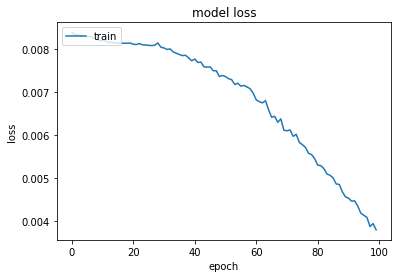

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history[ 'loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train'], loc= 'upper left' )
plt.show()

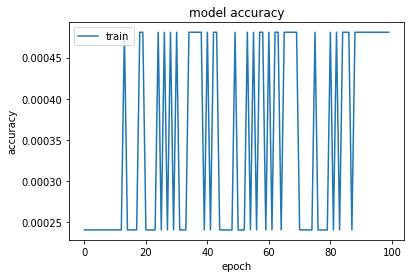

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history[ 'accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' ], loc= 'upper left' )
plt.show()

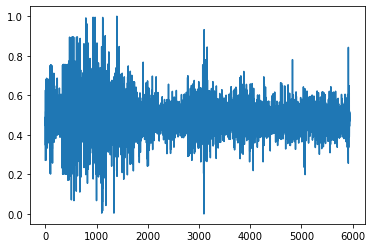

In [191]:
import matplotlib.pyplot as plt
A=ans
plt.plot(range(len(A)),A)

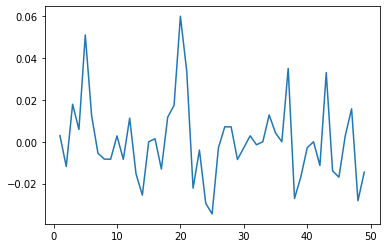

In [169]:
plt.plot(range(len(ser[0])),ser[0])

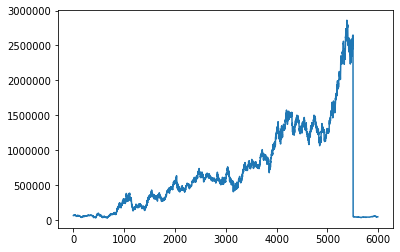

In [175]:
T=list(S_test.loc[:,'종가'])
T.reverse()
plt.plot( range(len(T)),T  )

In [176]:
X=pd.Series([1,2,3])
X.max()

3

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

In [15]:
sampledata=tf.random.normal([32,10,8])
sampleout=tf.random.normal([32,1])
model=Sequential()
model.add( layers.LSTM(4, return_sequences=False, return_state=False) )
model.compile(loss='mse',optimizer='rmsprop')
history=model.fit(X_train,Y_train,epochs=100,batch_size=4,verbose=1)

ValueError: Input 0 of layer sequential is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 50]

In [ ]:
scores = model.evaluate(Xtt, Ytest) 
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Version2
============

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [2]:
path='C:/Users/mod96/Desktop/HSH/StudyingMaterials/Project - datascience/dataset'
seq_len=50

In [3]:
data=pd.read_csv(open(path+'/005930.csv'))
data.drop(['Unnamed: 0','전일비','날짜'],axis=1,inplace=True)
data=data.reindex(index=data.index[::-1])
data.head()

,종가,시가,고가,저가,거래량
5995,67500.0,66500.0,68300.0,65600.0,112960.0
5994,67700.0,67600.0,67900.0,66000.0,136630.0
5993,66900.0,67500.0,67700.0,66700.0,155450.0
5992,68100.0,67300.0,68500.0,67200.0,138430.0
5991,68500.0,68100.0,69100.0,67100.0,96710.0


In [4]:
datanp=data.to_numpy()
np.isnan(datanp).any()

False

In [12]:
data

,종가,시가,고가,저가,거래량
5995,67500.0,66500.0,68300.0,65600.0,112960.0
5994,67700.0,67600.0,67900.0,66000.0,136630.0
5993,66900.0,67500.0,67700.0,66700.0,155450.0
5992,68100.0,67300.0,68500.0,67200.0,138430.0
5991,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...
4,49850.0,50200.0,50300.0,49500.0,18754442.0
3,49350.0,49650.0,49750.0,49000.0,15618347.0
2,49850.0,49350.0,50000.0,49100.0,14049471.0
1,50100.0,49850.0,50100.0,49300.0,16095399.0


Ver2 - 1.데이터 준비, 액면분할 처리, 공란 채우기
=================

In [37]:
def datapreparation():
    data=pd.read_csv(open(path+'/005930.csv'))
    data.drop(['Unnamed: 0','전일비','날짜'],axis=1,inplace=True)
    data=data.reindex(index=data.index[::-1])
    
    return data


def FaceDivision(df):
    assert ~np.isnan(df.to_numpy()).any(), "there exist NaN in raw data"
    
    temp1=pd.DataFrame(df.to_numpy(),columns=df.columns)
    temp2=temp1.drop('거래량',axis=1)
    index1=list(temp1[temp1['거래량']==0].index) 
    
    #비인기주는 아무도 관심을 주지 않아(...) 거래량이 0인 경우도 있다.
    #또한 액면분할은 여러번 있을 수 있다.
    
    DivisionDays=[]
    for i in range(len(index1)-1):
        if index1[i+1]-index1[i] >1:
            DivisionDays.append(index1[:i+1])
            index1=index1[i+1:]
            
    DivisionDays.append(index1)
    
    for i in range(len(DivisionDays)):
        beforeDivision=temp2.loc[DivisionDays[i][0]-1,'종가']
        afterDivision=temp2.loc[DivisionDays[i][-1]+1,'시가']
        ratio=afterDivision/beforeDivision
        if 1/ratio>=1.5:                       #after 에 비해 before 가 1.5 배 이상이면 액면분할이라 가정
            temp2.loc[:DivisionDays[i][-1]]=temp2.loc[:DivisionDays[i][-1]]*ratio   #df의 slicing 은 거기까지 포함한다.
    
    return temp2

def Emptyfill(df):            #종가가 모두 존재한다는 가정 하에 시가/고가/저가 항목이 비어있으면 채워준다.
    temp=np.array(df.loc[:,'종가'])
    temp=np.where(temp==0,np.nan,temp)
    assert ~np.isnan(temp).any(), "there exist 0 in '종가' column"
    
    for item in ['시가','고가','저가']:
        index1=list(df[df[item].map(int)==0].index)
        for each in index1:
            df.loc[each,item]=df.loc[each,'종가']
    
    return df

data=Emptyfill(FaceDivision(datapreparation()))
data.loc[5503:5509,:]

,종가,시가,고가,저가
5503,52140.0,50420.0,52160.0,50400.0
5504,53000.0,53380.0,53640.0,52440.0
5505,53000.0,53000.0,53000.0,53000.0
5506,53000.0,53000.0,53000.0,53000.0
5507,53000.0,53000.0,53000.0,53000.0
5508,51900.0,53000.0,53900.0,51800.0
5509,52600.0,52600.0,53200.0,51900.0


In [41]:
data.head()

,종가,시가,고가,저가
0,1350.0,1330.0,1366.0,1312.0
1,1354.0,1352.0,1358.0,1320.0
2,1338.0,1350.0,1354.0,1334.0
3,1362.0,1346.0,1370.0,1344.0
4,1370.0,1362.0,1382.0,1342.0


Ver2 - 2.sequential하게 쪼개기 / normalization / train_test_split
===========

In [73]:
def df2nps(df,seqlen):
    seq_len=seqlen+1
    temp=df.to_numpy()
    result=[]
    for i in range(df.shape[0]-seq_len):
        result.append( temp[i:i+seq_len,:] )
        
    return np.array(result)


def normalization(result):
    for table in result:
        for i in range(table.shape[1]):
            denominator=float(table[0,i])
            table[:,i]=(table[:,i]/denominator)-1
    return result



def train_test_split(result,train_ratio,TARGET=2):  #sklearn 에서 자동으로 섞어주는게 있는데 그것보단 순서 고려해서 쪼개는게 좋은듯
    ratio=int(round(len(result)*train_ratio))
    train=result[:ratio,:,:]
    np.random.shuffle(train)
    x_train=train[:,:-1,:]
    y_train=train[:,-1,TARGET]
    x_test=result[ratio:,:-1,:]
    y_test=result[ratio:,-1,TARGET]
    print("x_train shape :",x_train.shape,"y_train shape :",y_train.shape,
          "x_test shape :",x_test.shape,"y_test shape :",y_test.shape,)
    return x_train, y_train, x_test, y_test

    
result=normalization(df2nps(data,50))
x_train, y_train, x_test, y_test = train_test_split(result,0.9)

x_train shape : (5350, 50, 4) y_train shape : (5350,) x_test shape : (595, 50, 4) y_test shape : (595,)


Ver2 - 3.Model1
==========

In [76]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
model=Sequential()
model.add( layers.LSTM(25, return_sequences=True,input_shape=(50,4)) )
model.add( layers.LSTM(50, return_sequences=False))
model.add( layers.Dense(1, activation='linear'))
model.compile(loss='MSE',optimizer='adam',metrics=['accuracy'])

In [77]:
history=model.fit(x_train,y_train,epochs=20,batch_size=10,verbose=1)

Train on 5350 samples
Epoch 1/20
5350/5350 [==============================] - 25s 5ms/sample - loss: 0.0032 - accuracy: 0.0039
Epoch 2/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 0.0017 - accuracy: 0.0039s -
Epoch 3/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 0.0011 - accuracy: 0.0039
Epoch 4/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 7.9922e-04 - accuracy: 0.0039
Epoch 5/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 7.3895e-04 - accuracy: 0.0039
Epoch 6/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 6.8911e-04 - accuracy: 0.0039
Epoch 7/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 6.4745e-04 - accuracy: 0.0039
Epoch 8/20
5350/5350 [==============================] - 28s 5ms/sample - loss: 6.3873e-04 - accuracy: 0.0039
Epoch 9/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 5.8860e-04 - accuracy: 0.0039
Epoch 

In [78]:
scores = model.evaluate(x_test, y_test) 
print("%s: %.5f%%" % (model.metrics_names[1], scores[1] * 100))

595/595 [==============================] - 1s 2ms/sample - loss: 1.9405e-04 - accuracy: 0.0050
accuracy: 0.50420%


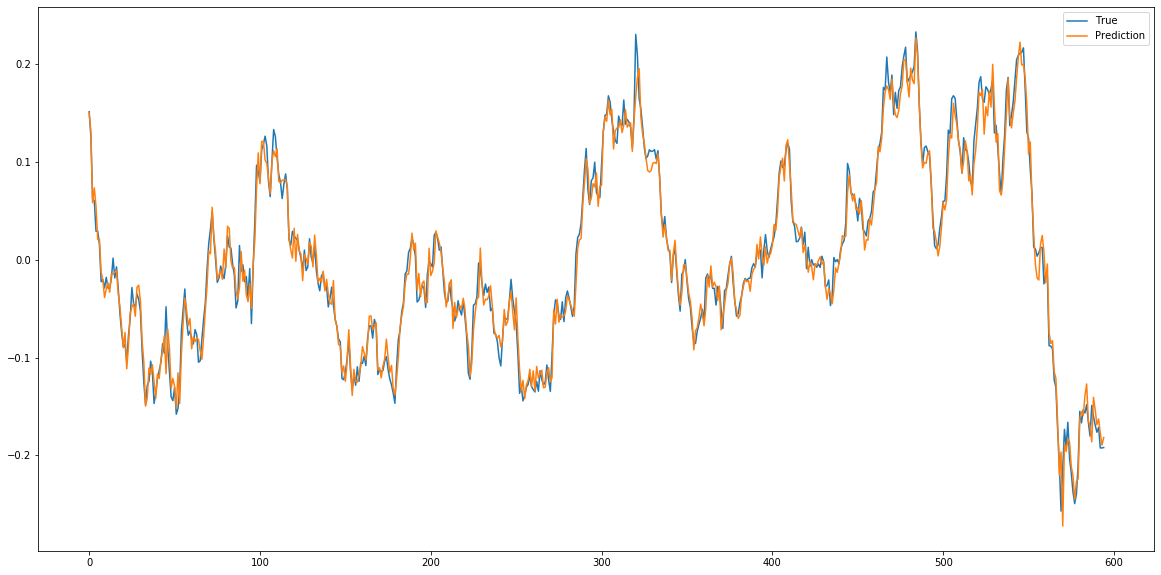

In [79]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

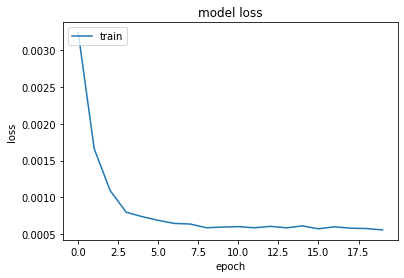

In [80]:
plt.plot(history.history[ 'loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train'], loc= 'upper left' )
plt.show()

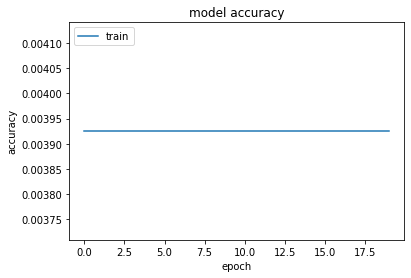

In [81]:
plt.plot(history.history[ 'accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' ], loc= 'upper left' )
plt.show()

Ver2 - 4.model2
========

In [85]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
model=Sequential()
model.add( layers.GRU(25, return_sequences=True,input_shape=(50,4)) )
model.add( layers.GRU(50, return_sequences=False))
model.add( layers.Dense(1, activation='linear'))
model.compile(loss='MSE',optimizer='adam',metrics=['accuracy'])

In [87]:
history=model.fit(x_train,y_train,epochs=20,batch_size=10,verbose=1)

Train on 5350 samples
Epoch 1/20
5350/5350 [==============================] - 29s 5ms/sample - loss: 0.0024 - accuracy: 0.0039
Epoch 2/20
5350/5350 [==============================] - 27s 5ms/sample - loss: 8.5706e-04 - accuracy: 0.0039
Epoch 3/20
5350/5350 [==============================] - 19s 4ms/sample - loss: 6.6516e-04 - accuracy: 0.0039
Epoch 4/20
5350/5350 [==============================] - 27s 5ms/sample - loss: 6.4747e-04 - accuracy: 0.0039
Epoch 5/20
5350/5350 [==============================] - 27s 5ms/sample - loss: 6.7227e-04 - accuracy: 0.0039
Epoch 6/20
5350/5350 [==============================] - 25s 5ms/sample - loss: 6.2462e-04 - accuracy: 0.0039
Epoch 7/20
5350/5350 [==============================] - 27s 5ms/sample - loss: 6.0713e-04 - accuracy: 0.0039
Epoch 8/20
5350/5350 [==============================] - 28s 5ms/sample - loss: 6.1230e-04 - accuracy: 0.0039
Epoch 9/20
5350/5350 [==============================] - 28s 5ms/sample - loss: 6.2865e-04 - accuracy: 0.0039
E

In [88]:
scores = model.evaluate(x_test, y_test) 
print("%s: %.5f%%" % (model.metrics_names[1], scores[1] * 100))

595/595 [==============================] - 0s 629us/sample - loss: 2.0991e-04 - accuracy: 0.0050
accuracy: 0.50420%


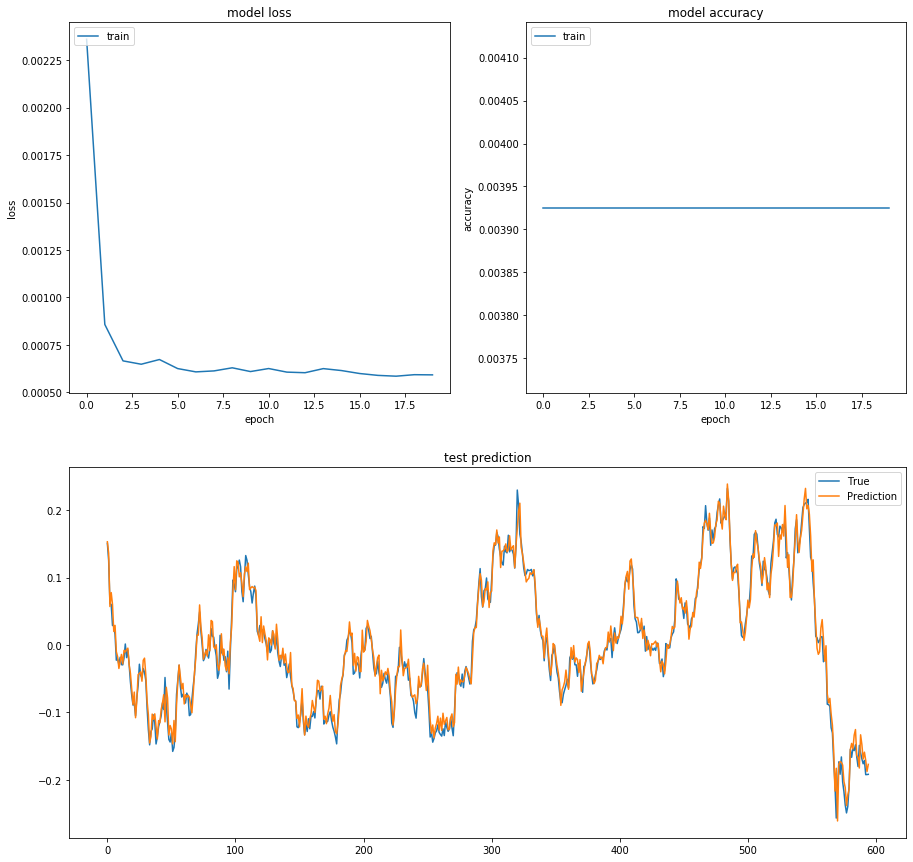

In [95]:
def visualization(model,history,x_test,y_test):
    pred = model.predict(x_test)

    fig = plt.figure(facecolor='white', figsize=(15, 15))
    ax1 = fig.add_subplot(212)
    ax1.plot(y_test, label='True')
    ax1.plot(pred, label='Prediction')
    ax1.legend()
    ax1.set_title('test prediction')

    ax2 = fig.add_subplot(221)
    ax2.plot(history.history[ 'loss' ])
    ax2.set_title( 'model loss' )
    ax2.set_ylabel( 'loss' )
    ax2.set_xlabel( 'epoch' )
    ax2.legend([ 'train'], loc= 'upper left' )

    ax3 = fig.add_subplot(222)
    ax3.plot(history.history[ 'accuracy' ])
    ax3.set_title( 'model accuracy' )
    ax3.set_ylabel( 'accuracy' )
    ax3.set_xlabel( 'epoch' )
    ax3.legend([ 'train' ], loc= 'upper left' )

    plt.show()
visualization()